Logistic Regression은 이름에서 Regression이 들어간 것처럼, 회귀 분석 방법으로 분류 문제에 접근한다. 일반적인 회귀 분석의 목표와 동일하게 종속 변수와 독립 변수 간의 관계를 선형 함수로 나타내어 종속 변수의 발생 확률을 예측하는 분류 기법이다.

# 선형 회귀(Linear Regression)
선형 회귀의 식은 다음과 같다.
$$H(X) = W^TX + b = w_1x_1 + w_2x_2 + \cdots + w_kx_k + b$$
선형 회귀는 독립 변수들과 종속 변수 간의 선형관계를 가정하고 이를 잘 나타내는 회귀계수 $W$를 데이터로부터 추정한다. 선형 회귀는 일반적으로 수치(Continuous) 예측 문제에 사용한다. 분류 모델에 사용할 경우 불가능한 것은 아니지만 예측 결과의 범위가 [$-\infty$, $\infty$]로 [0, 1]의 범위를 넘어가게 된다.

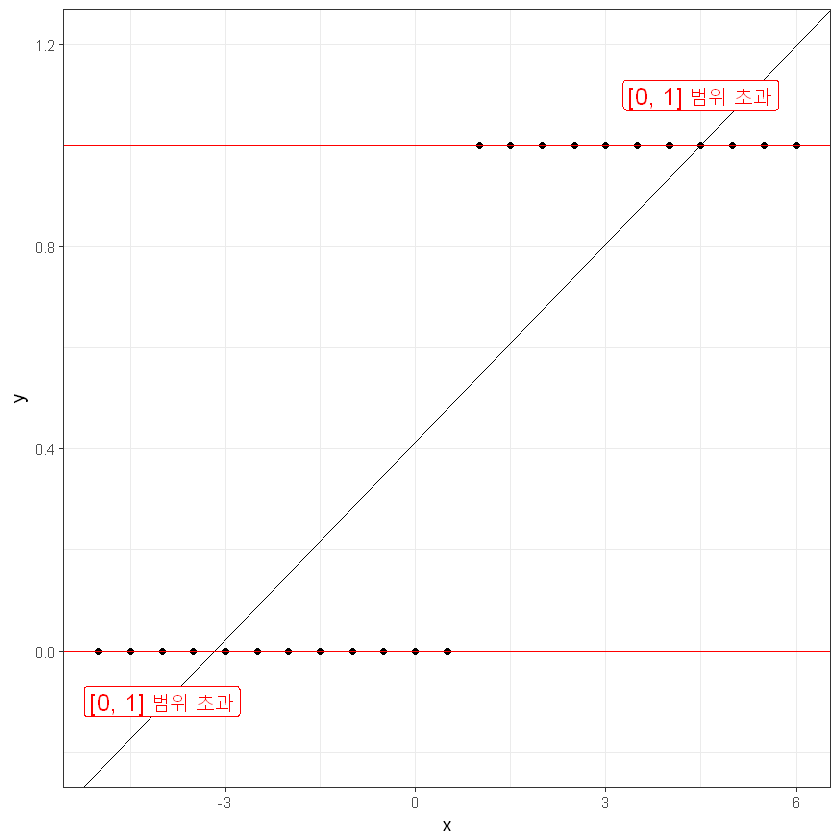

In [13]:
# Load library
library(ggplot2)

# Generate data
x <- seq(-5, 6, 0.5)
y <- c(rep(0, 12), rep(1, 11))
data <- data.frame(x = x, y = y)

# Train Linear Regression
lm.fit <- lm(y ~ x, data)

# Plot
ggplot(data, aes(x, y)) + geom_point() + 
  geom_abline(slope = lm.fit$coefficients[2], intercept = lm.fit$coefficients[1]) +
  ylim(c(-0.2, 1.2)) +
  geom_label(label = "[0, 1] 범위 초과", x = -4, y = -0.1, col = "red", size = 5) +
  geom_label(label = "[0, 1] 범위 초과", x = 4.5, y = 1.1, col = "red", size = 5) +
  geom_hline(yintercept = 0, col = "red") + geom_hline(yintercept = 1, col = "red") +
  theme_bw()

이러한 문제를 해결하기 위해 결과값인 $H(X)$를 [0, 1] 범위로 갖게 해주는 연결 함수가 필요하다.

# 시그모이드 함수(Sigmoid Function)
이항 분류 문제에 적합한 함수로 시그모이드(Sigmoid) 함수가 있다. 그래프의 모양은 아래와 같이 s자 형태로 x = 0을 중심으로 $-\infty$로 갈수록 0으로 수렴하고 $\infty$로 갈수록 1에 수렴한다. 즉, 모든 $x$값에 대해 [0, 1] 범위의 값을 갖게 해준다.
$$g(z) = \frac{1}{1 + e^{-z}} = \frac{e^z}{1 + e^z}$$

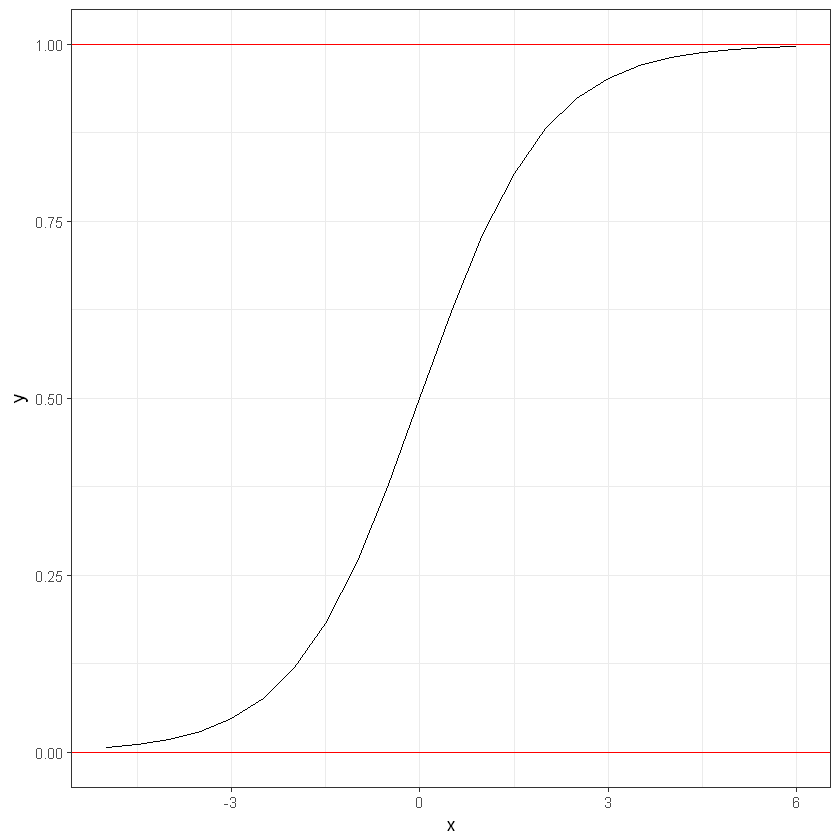

In [14]:
# Generate data
x2 <- seq(-5, 6, 0.5)
y2 <- 1/(1 + exp(-x2)) # Sigmoid function
data2 <- data.frame(x = x2, y = y2)

# Plot
ggplot(data2, aes(x, y)) + geom_line() + 
  geom_hline(yintercept = 0, col = "red") + geom_hline(yintercept = 1, col = "red") + theme_bw()

이 시그모이드 함수 $g(z)$를 사용하여 $H(X) = W^TX + b$를  $[-\infty, \infty]$ 범위에서 [0, 1] 범위로 바꾸어준다.
$$g(z) = g(W^TX + b) = \frac{1}{1 + e^{-(W^TX+b)}}$$

승산(Odds)과 로짓 변환(logit transformation)을 통해 좀 더 자세하게 살펴보자.

## 승산(Odds)
승산(Odds)란 성공 확률 / 실패 확률을 나타내고 아래와 같이 표현된다.
$$\text{Odds} = \frac{p(y=1 | x)}{p(y=0 | x)} = \frac{p(y=1|x)}{1-p(y=1|x)} = \frac{p}{1-p}$$

여기서 $p = p(y=1|x)$는 성공 확률을 나타내므로 [0, 1] 사이의 값을 가진다. 따라서 위의 Odds는 [0, $\infty$] 사이의 값을 갖게된다.
$$\text{Odds} = \begin{cases} \infty, & \text{if } p = 1 \\ 0, & \text{if } p = 0 \end{cases}$$

## 로짓 변환(logit transformation)
로짓 변환은 승산(Odds)에 log를 취한 값으로 아래와 같이 표현된다.
$$\ln (\text{Odds}) = \ln \frac{p}{1-p}$$

Odds가 [0, $\infty$] 사이의 값을 가지므로 자연 로그를 취한 값의 범위는 [-$\infty$, $\infty$]이 된다.
$$\ln (\text{Odds}) = \begin{cases} \infty, & \text{if } \text{Odds} = \infty \\ -\infty, & \text{if } \text{Odds} = 0\end{cases}$$

결국 확률 $p = p(y=1|x)$에 대해 승산 비를 구하고 거기에 자연 로그를 취했더니 [0, 1] 범위에서 [-$\infty$, $\infty$] 범위로 확장되는 함수가 만들어졌다. 이 함수를 이용하여 확률 $p$를 찾아야 하므로, 이 함수를 $p$에 대한 함수로 변환시키면 다음과 같다.

$$\ln \frac{p}{1-p} = W^TX + b$$

$$\frac{p}{1-p} = e^{W^TX + b}$$

$$\frac{1-p}{p} = \frac{1}{p} - 1 = \frac{1}{e^{W^TX + b}}$$

$$\frac{1}{p} = \frac{1}{e^{W^TX + b}} + 1 = \frac{1 + e^{W^TX + b}}{e^{W^TX + b}}$$

$$p = \frac{e^{W^X + b}}{1 + e^{W^TX + b}} = \frac{1}{1 + e^{-(W^TX + b)}}$$

# 회귀 계수 추정
선형 회귀와 마찬가지로 로지스틱 회귀에서도 회귀 계수를 추정하기 위해 경사하강법(Gradient Descent)을 사용한다. 하지만 선형 회귀에서 사용한 비용 함수(cost function)를 사용하게 될 경우, optimization problem이 non-convex가 되어서 Local Optima에 빠질 수 있다.

따라서 로지스틱 회귀에서는 다음과 같은 손실 함수를 사용한다.
$$\text{Loss Function} : L(\hat{y}, y) = -(y\log\hat{y} + (1-y)\log(1-\hat{y}))$$

손실 함수가 작을 수록 좋으므로 실제 값($y$)에 따라 손실 함수가 다음과 같이 변한다.
$$\text{Loss Function} = \begin{cases} -\log \hat{y}, & \text{if } y = 1 \rightarrow \text{가능한 큰 }\hat{y}(=1)\text{을 원함} \\ -\log (1-\hat{y}), & \text{if } y = 0 \rightarrow \text{가능한 작은 }\hat{y}(=0)\text{을 원함} \end{cases}$$

위의 손실 함수는 single training sample에 대한 것이므로, 전체 trianing sample에 대한 비용 함수는 다음과 같다.
$$\text{Cost Function} : J(W, b) = \frac{1}{m} \sum L(\hat{y}, y)$$ 
$$\text{ m = training sample 수}$$

# 실습

In [6]:
# Load library
library(caret)

# Load data
logit_data <- read.csv("https://stats.idre.ucla.edu/stat/data/binary.csv")
str(logit_data)
head(logit_data)

'data.frame':	400 obs. of  4 variables:
 $ admit: int  0 1 1 1 0 1 1 0 1 0 ...
 $ gre  : int  380 660 800 640 520 760 560 400 540 700 ...
 $ gpa  : num  3.61 3.67 4 3.19 2.93 3 2.98 3.08 3.39 3.92 ...
 $ rank : int  3 3 1 4 4 2 1 2 3 2 ...


admit,gre,gpa,rank
0,380,3.61,3
1,660,3.67,3
1,800,4.00,1
1,640,3.19,4
0,520,2.93,4
1,760,3.00,2


## Training

In [7]:
# Preprocessing
logit_data$rank <- as.factor(logit_data$rank)
logit_data$admit <- as.factor(logit_data$admit)

# Split data
train_idx <- createDataPartition(logit_data$admit, p = 0.7, list = F)
train <- logit_data[train_idx,]
test <- logit_data[-train_idx,]

# Train
logit.fit <- glm(admit ~ ., data = train, family = "binomial")
summary(logit.fit)


Call:
glm(formula = admit ~ ., family = "binomial", data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7419  -0.8620  -0.6333   1.1733   2.0860  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -4.652613   1.387961  -3.352 0.000802 ***
gre          0.003331   0.001351   2.466 0.013656 *  
gpa          0.820440   0.401604   2.043 0.041061 *  
rank2       -0.731995   0.384342  -1.905 0.056840 .  
rank3       -1.408345   0.417626  -3.372 0.000746 ***
rank4       -1.375948   0.482244  -2.853 0.004328 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 350.9  on 280  degrees of freedom
Residual deviance: 318.7  on 275  degrees of freedom
AIC: 330.7

Number of Fisher Scoring iterations: 4


## Predict

In [8]:
# Predict
logit.proc <- predict(logit.fit, newdata = test, type = "response")
logit.pred <- ifelse(logit.proc >= 0.5, 1, 0)

# Create confusion matrix
confusionMatrix(logit.pred, test$admit, positive = "1", mode = "everything")

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 74 25
         1  7 13
                                          
               Accuracy : 0.7311          
                 95% CI : (0.6421, 0.8082)
    No Information Rate : 0.6807          
    P-Value [Acc > NIR] : 0.139214        
                                          
                  Kappa : 0.2925          
 Mcnemar's Test P-Value : 0.002654        
                                          
            Sensitivity : 0.3421          
            Specificity : 0.9136          
         Pos Pred Value : 0.6500          
         Neg Pred Value : 0.7475          
              Precision : 0.6500          
                 Recall : 0.3421          
                     F1 : 0.4483          
             Prevalence : 0.3193          
         Detection Rate : 0.1092          
   Detection Prevalence : 0.1681          
      Balanced Accuracy : 0.6278          
                                    

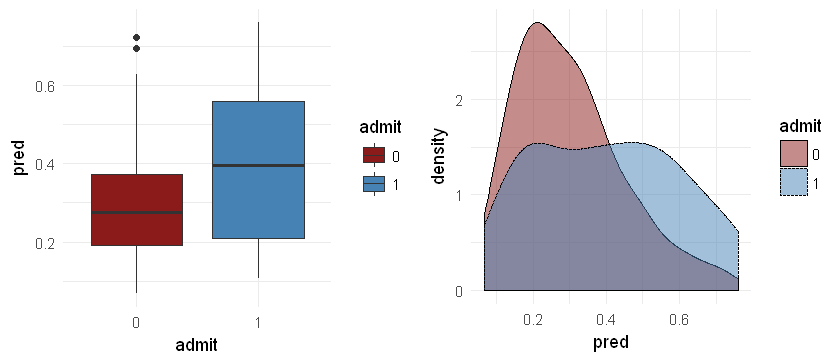

In [119]:
library(gridExtra)
options(repr.plot.width=7, repr.plot.height=3)
p1 <- ggplot(data.frame(admit = test$admit, pred = logit.proc), aes(admit, pred, group = admit, fill = admit)) + 
  geom_boxplot() + scale_fill_manual(name = "admit", values = c("firebrick4", "steelblue")) + theme_minimal()

p2 <- ggplot(data.frame(admit = test$admit, pred = logit.proc), aes(pred, linetype = admit, fill = admit)) +
  geom_density(alpha = 0.5) + scale_fill_manual(name = "admit", values = c("firebrick4", "steelblue")) + theme_minimal()
grid.arrange(p1, p2, ncol = 2)

## ROC Curve

[1] 0.649935

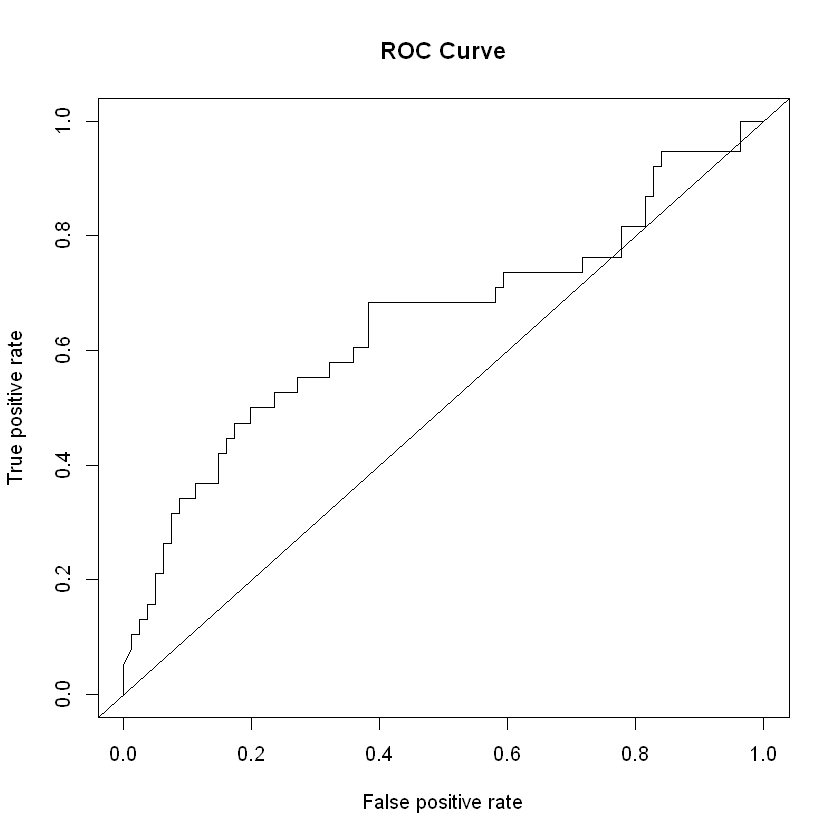

In [28]:
# Load library
library(ROCR)

pred <- prediction(logit.proc, test$admit)
perf <- performance(pred, measure = "tpr", x.measure = "fpr")
plot(perf, col = 'black', main = "ROC Curve")
abline(0, 1)
performance(pred, "auc")@y.values[[1]]

In [120]:
predObj <- prediction(logit.proc, test$admit)
precisionObj <- performance(predObj, measure = "prec")
recallObj <- performance(predObj, measure = "rec")

In [123]:
precision <- (precisionObj@y.values)[[1]]
prec.x <- (precisionObj@x.values)[[1]]
recall <- (recallObj@y.values)[[1]]

In [125]:
rocFrame <- data.frame(threshold = prec.x, precision = precision, recall = recall)

In [126]:
nplot <- function(plist) {
    n <- length(plist)
    grid.newpage()
    pushViewport(viewport(layout=grid.layout(n,1)))
    vplayout = function(x, y) {viewport(layout.pos.row = x, layout.pos.col = y)}
    for (i in 1:n) {
        print(plist[[i]], vp = vplayout(i,1))
    }
}

In [127]:
pnull <- mean(as.numeric(test$admit))

Warning message:
"Removed 1 rows containing missing values (geom_path)."

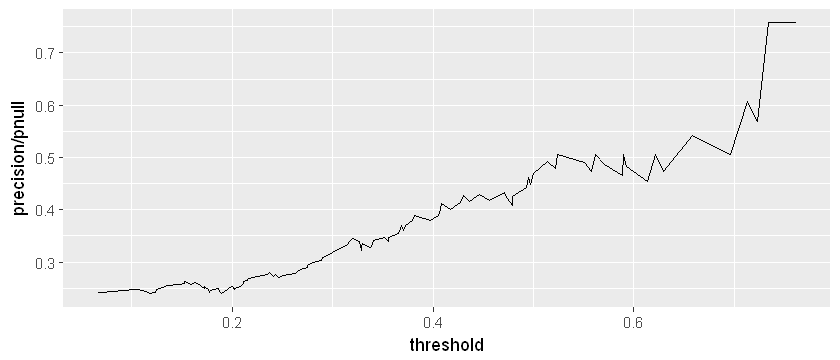

In [131]:
p1 <- ggplot(rocFrame, aes(x = threshold)) + geom_line(aes(y = precision/pnull))
p1

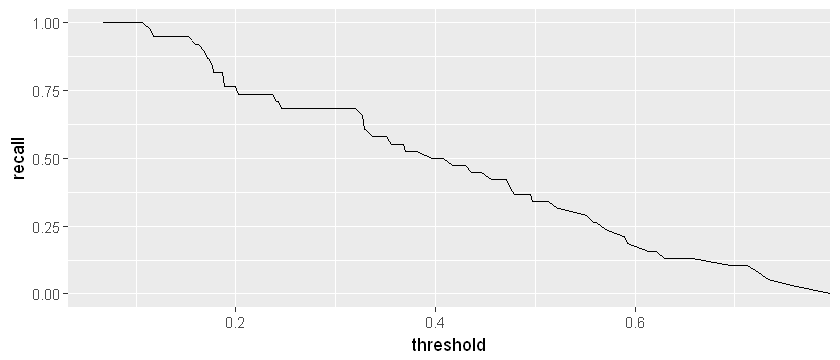

In [132]:
p2 <- ggplot(rocFrame, aes(x = threshold)) + geom_line(aes(y=recall))
p2

Warning message:
"Removed 1 rows containing missing values (geom_path)."

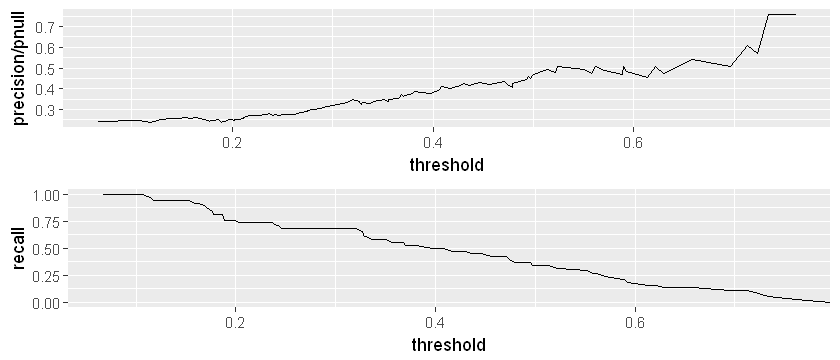

In [134]:
library(grid)
nplot(list(p1, p2))